In [1]:
from tensorflow import keras
import mdn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib notebook

## Generate Synthetic Data

data generation

In [2]:
NSAMPLE = 5000

z_data = np.float32(np.random.uniform(-10.5, 10.5, NSAMPLE))
r_data = np.random.normal(size=NSAMPLE)
s_data = np.random.normal(size=NSAMPLE)
x_data = np.sin(0.75 * z_data) * 7.0 + z_data * 0.5 + r_data * 1.0
y_data = np.cos(0.80 * z_data) * 6.5 + z_data * 0.5 + s_data * 1.0

x_input = z_data.reshape((NSAMPLE, 1))
y_input = np.array([x_data,y_data])
y_input = y_input.T #reshape to (NSAMPLE,2)

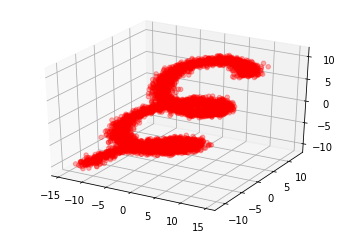

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.3, c='r') #c=perf_down_sampled.moving
plt.show()

## Build the MDN Model

Now we will construct the MDN model in Keras. This uses Sequential model interface in Keras.

The MDN layer comes after one or more Dense layers. You need to define the output dimension and number of mixtures for the MDN like so: MDN(output_dimension, number_mixtures).

For this problem, we only need an output dimension of 1 as we are predicting one value (y). Adding more mixtures adds a more parameters (model is more complex, takes longer to train), but might help make the solutions better. You can see from the training data that there are at maximum 5 different layers to predict in the curve, so setting N_MIXES = 5 is a good place to start.

For MDNs, we have to use a special loss function that can handle the mixture parameters: the function has to take into account the number of output dimensions and mixtures.

In [4]:
N_HIDDEN = 15
N_MIXES = 10
OUTPUT_DIMS = 2

In [5]:
model = keras.Sequential()
model.add(keras.layers.Dense(
    N_HIDDEN, input_dim=1, activation='relu'))
model.add(mdn.MDN(OUTPUT_DIMS, N_MIXES))
model.compile(
    loss=mdn.get_mixture_loss_func(OUTPUT_DIMS, N_MIXES),
    optimizer=keras.optimizers.Adam())

W1111 18:15:51.483562 140223732942592 deprecation.py:506] From /home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow_core/python/ops/linalg/linear_operator_diag.py:166: calling LinearOperator.__init__ (from tensorflow.python.ops.linalg.linear_operator) with graph_parents is deprecated and will be removed in a future version.
Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                30        
_________________________________________________________________
mdn (MDN)                    (None, 50)                800       
Total params: 830
Trainable params: 830
Non-trainable params: 0
_________________________________________________________________


Now we train the model using Keras' normal fit command.

In [7]:
history = model.fit(
    x=x_input,
    y=y_input,
    batch_size=128,
    epochs=300,
    validation_split=0.15,
    callbacks=[keras.callbacks.TerminateOnNaN(),
                         keras.callbacks.TensorBoard()]
)

Train on 4250 samples, validate on 750 samples
Epoch 1/300
4250/4250 [==============================] - 5s 1ms/sample - loss: 15.5995 - val_loss: 12.6663
Epoch 2/300
4250/4250 [==============================] - 0s 26us/sample - loss: 11.3796 - val_loss: 10.2227
Epoch 3/300
4250/4250 [==============================] - 0s 25us/sample - loss: 9.6422 - val_loss: 8.8889
Epoch 4/300
4250/4250 [==============================] - 0s 26us/sample - loss: 8.5131 - val_loss: 8.0087
Epoch 5/300
4250/4250 [==============================] - 0s 25us/sample - loss: 7.7822 - val_loss: 7.4602
Epoch 6/300
4250/4250 [==============================] - 0s 26us/sample - loss: 7.3225 - val_loss: 7.1142
Epoch 7/300
4250/4250 [==============================] - 0s 24us/sample - loss: 7.0214 - val_loss: 6.8677
Epoch 8/300
4250/4250 [==============================] - 0s 26us/sample - loss: 6.7927 - val_loss: 6.6630
Epoch 9/300
4250/4250 [==============================] - 0s 24us/sample - loss: 6.6113 - val_loss: 6.5

4250/4250 [==============================] - 0s 24us/sample - loss: 4.5623 - val_loss: 4.6267
Epoch 78/300
4250/4250 [==============================] - 0s 23us/sample - loss: 4.5505 - val_loss: 4.6102
Epoch 79/300
4250/4250 [==============================] - 0s 23us/sample - loss: 4.5390 - val_loss: 4.6041
Epoch 80/300
4250/4250 [==============================] - 0s 23us/sample - loss: 4.5280 - val_loss: 4.5923
Epoch 81/300
4250/4250 [==============================] - 0s 23us/sample - loss: 4.5159 - val_loss: 4.5791
Epoch 82/300
4250/4250 [==============================] - 0s 23us/sample - loss: 4.5044 - val_loss: 4.5698
Epoch 83/300
4250/4250 [==============================] - 0s 24us/sample - loss: 4.4946 - val_loss: 4.5555
Epoch 84/300
4250/4250 [==============================] - 0s 23us/sample - loss: 4.4825 - val_loss: 4.5452
Epoch 85/300
4250/4250 [==============================] - 0s 23us/sample - loss: 4.4721 - val_loss: 4.5361
Epoch 86/300
4250/4250 [==========================

4250/4250 [==============================] - 0s 22us/sample - loss: 3.7394 - val_loss: 3.7673
Epoch 154/300
4250/4250 [==============================] - 0s 22us/sample - loss: 3.7312 - val_loss: 3.7697
Epoch 155/300
4250/4250 [==============================] - 0s 22us/sample - loss: 3.7258 - val_loss: 3.7550
Epoch 156/300
4250/4250 [==============================] - 0s 22us/sample - loss: 3.7185 - val_loss: 3.7470
Epoch 157/300
4250/4250 [==============================] - 0s 22us/sample - loss: 3.7087 - val_loss: 3.7416
Epoch 158/300
4250/4250 [==============================] - 0s 21us/sample - loss: 3.7009 - val_loss: 3.7283
Epoch 159/300
4250/4250 [==============================] - 0s 22us/sample - loss: 3.6930 - val_loss: 3.7203
Epoch 160/300
4250/4250 [==============================] - 0s 22us/sample - loss: 3.6853 - val_loss: 3.7233
Epoch 161/300
4250/4250 [==============================] - 0s 23us/sample - loss: 3.6808 - val_loss: 3.7104
Epoch 162/300
4250/4250 [=================

Epoch 229/300
4250/4250 [==============================] - 0s 22us/sample - loss: 3.3488 - val_loss: 3.3524
Epoch 230/300
4250/4250 [==============================] - 0s 22us/sample - loss: 3.3435 - val_loss: 3.3458
Epoch 231/300
4250/4250 [==============================] - 0s 22us/sample - loss: 3.3425 - val_loss: 3.3480
Epoch 232/300
4250/4250 [==============================] - 0s 23us/sample - loss: 3.3414 - val_loss: 3.3405
Epoch 233/300
4250/4250 [==============================] - 0s 23us/sample - loss: 3.3395 - val_loss: 3.3555
Epoch 234/300
4250/4250 [==============================] - 0s 24us/sample - loss: 3.3353 - val_loss: 3.3397
Epoch 235/300
4250/4250 [==============================] - 0s 22us/sample - loss: 3.3349 - val_loss: 3.3378
Epoch 236/300
4250/4250 [==============================] - 0s 23us/sample - loss: 3.3334 - val_loss: 3.3370
Epoch 237/300
4250/4250 [==============================] - 0s 23us/sample - loss: 3.3335 - val_loss: 3.3382
Epoch 238/300
4250/4250 [===

## Try out the MDN Model

Now we try out the model by making predictions at 3000 evenly spaced points on the x-axis.

Mixture models output lists of parameters, so we're going to sample from these parameters for each point on the x-axis, and also try plotting the parameters themselves so we can have some insight into what the model is learning!

In [11]:
## Sample on some test data:
x_test = np.float32(np.arange(-15, 15, 0.1))
NTEST = x_test.size
print("Testing:", NTEST, "samples.")
x_test = x_test.reshape(NTEST, 1)  # needs to be a matrix, not a vector

Testing: 300 samples.


In [13]:
#Make predition from the model
y_test = model.predict(x_test)
# y_test contains parameters for distributions, not actual points on the graph.
# To find points on the graph, we need to sample from each distribution.

# Split up the mixture parameters (for future fun)
mus = np.apply_along_axis(
    (lambda a: a[:N_MIXES*OUTPUT_DIMS]), 1, y_test)
sigs = np.apply_along_axis(
    (lambda a: a[N_MIXES*OUTPUT_DIMS:2*N_MIXES*OUTPUT_DIMS]),1,
    y_test)
pis = np.apply_along_axis(
    (lambda a: mdn.softmax(a[-N_MIXES:])), 1, y_test)

# Sample from the predicted distributions
y_samples = np.apply_along_axis(
    mdn.sample_from_output, 1, y_test, OUTPUT_DIMS, N_MIXES,
    temp=1.0, sigma_temp=1.0)

In [18]:
print(y_test.shape)
print(mus.shape)
print(sigs.shape)
print(pis.shape)

(300, 50)
(300, 20)
(300, 20)
(300, 10)


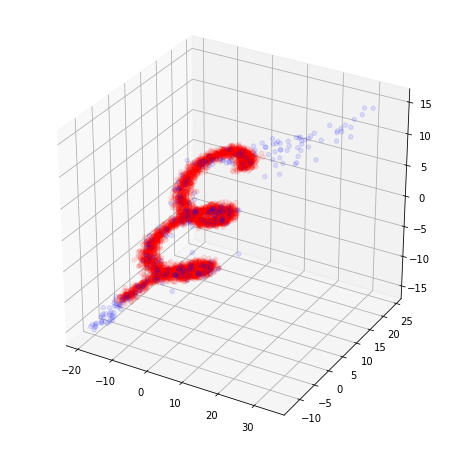

In [19]:
# Plot the predicted samples.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.1, c='r') #c=perf_down_sampled.moving
ax.scatter(y_samples.T[0], y_samples.T[1], x_test, alpha=0.1, c='b') #c=perf_down_sampled.moving
plt.show()

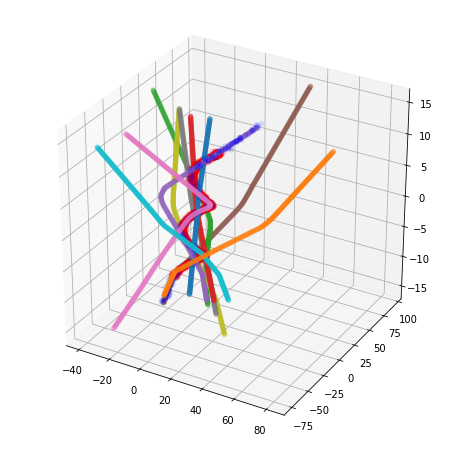

In [21]:
# Plot the means - this gives us some insight into how the model learns to 
# produce the mixtures.
# Cool!

# Plot the predicted samples.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.1, c='r') #c=perf_down_sampled.moving
ax.scatter(y_samples.T[0], y_samples.T[1], x_test, alpha=0.1, c='b') #c=perf_down_sampled.moving
for m in range(N_MIXES):
    one_pair = mus[m*OUTPUT_DIMS:(m+1)*OUTPUT_DIMS]
    ax.scatter(mus[:,2*m], mus[:,2*m + 1] , x_test, marker='o',alpha=0.3)
plt.show()

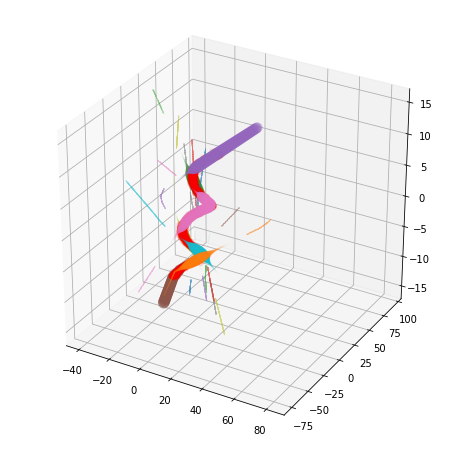

In [22]:
# Let's plot the variances and weightings of the means as well.

# Plot the predicted samples.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.1, c='r') #c=perf_down_sampled.moving
for m in range(N_MIXES):
    one_pair = mus[m*OUTPUT_DIMS:(m+1)*OUTPUT_DIMS]
    ax.scatter(mus[:,2*m], mus[:,2*m + 1] , x_test, s=100*sigs[:,2*m]*pis[:,m], marker='o',alpha=0.3)
plt.show()